# Welcome to the Lab 🥼🧪
## How do I retrieve and download price feeds for historical backtesting?

In this notebook, we will retrieve all price feeds, back to 2011, for markets currently tradeable on the [Parcl Exchange](https://app.parcl.co/collection/active-markets)

**Note** This notebook will work with any of the dozens of daily price feeds available.

As a reminder, you can get your Parcl Labs API key [here](https://dashboard.parcllabs.com/signup) to follow along.

To run this immediately, you can use Google Colab. Remember, you must set your `PARCL_LABS_API_KEY`.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ParclLabs/parcllabs-examples/blob/main/python/introduction/price_feed.ipynb)


In this notebook, we will create a spreadsheet for backtesting like the one below:

| date       | price_feed | parcl_id | name        | location_type | total_population | median_income |
|------------|------------|----------|-------------|---------------|------------------|---------------|
| 2024-06-17 | 415.29     | 5306725  | Denver City | CITY          | 710800           | 85853         |
| 2024-06-16 | 415.16     | 5306725  | Denver City | CITY          | 710800           | 85853         |
| 2024-06-15 | 414.92     | 5306725  | Denver City | CITY          | 710800           | 85853         |
| 2024-06-14 | 414.58     | 5306725  | Denver City | CITY          | 710800           | 85853         |
| 2024-06-13 | 414.61     | 5306725  | Denver City | CITY          | 710800           | 85853         |


### 1. Import the Parcl Labs Python Library

In [1]:
# if needed, install and/or upgrade to the latest verison of the Parcl Labs Python library
%pip install --upgrade parcllabs matplotlib

In [1]:
import os
from parcllabs import ParclLabsClient

client = ParclLabsClient(
    api_key=os.environ.get('PARCL_LABS_API_KEY', "<your Parcl Labs API key if not set as environment variable>"), 
    limit=12 # set default limit
)

### 2. Search for Parcl Exchange Markets

In [3]:
# lets get all US markets currently available to trade on the Parcl Exchange
# Now lets say you want all price feed markets that are on the parcl exchange
sales_pricefeed_markets = client.search.markets.retrieve(
    sort_by='PARCL_EXCHANGE_MARKET',
    limit=15,  # expand the default limit to 14, as of this writing, 14 markets are available
)

sales_pricefeed_markets

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type,total_population,median_income,parcl_exchange_market,pricefeed_market,case_shiller_10_market,case_shiller_20_market
0,5306725,USA,0820000,08,Denver City,CO,MOUNTAIN,CITY,710800,85853,1,1,0,0
1,5353022,USA,1245025,12,Miami Beach City,FL,SOUTH_ATLANTIC,CITY,82400,65116,1,1,0,0
2,5387853,USA,1714000,17,Chicago City,IL,EAST_NORTH_CENTRAL,CITY,2721914,71673,1,1,0,0
3,5377230,USA,3240000,32,Las Vegas City,NV,MOUNTAIN,CITY,644835,66356,1,1,0,0
4,5374167,USA,0666000,06,San Diego City,CA,PACIFIC,CITY,1383987,98657,1,1,0,0
5,5384169,USA,1304000,13,Atlanta City,GA,SOUTH_ATLANTIC,CITY,494838,77655,1,1,0,0
6,5352987,USA,1245000,12,Miami City,FL,SOUTH_ATLANTIC,CITY,443665,54858,1,1,0,0
7,5822447,USA,36047,36,Kings County,NY,MIDDLE_ATLANTIC,COUNTY,2679620,74692,1,1,0,0
8,5826765,USA,None,None,United States Of America,None,None,COUNTRY,331097593,75149,1,1,0,0
9,5374321,USA,0667000,06,San Francisco City,CA,PACIFIC,CITY,851036,136689,1,1,0,0


In [4]:
# lets store the parcl_ids of the markets we are interested in
sales_pricefeed_parcl_ids = sales_pricefeed_markets['parcl_id'].tolist()

### 3. Retrieve Sales Price Feeds Data

In [9]:
# lets retrieve data back to 2011 for these price feeds
START_DATE = '2011-01-01'

sales_price_feeds = client.price_feed.price_feed.retrieve(
    parcl_ids=sales_pricefeed_parcl_ids,
    start_date=START_DATE,
    limit=1000,  # expand the limit to 1000, these are daily series
    auto_paginate=True, # auto paginate to get all the data - WARNING: ~6k credits can be used in one parcl price feed. Change the START_DATE to a more recent date to reduce the number of credits used
)

sales_price_feeds.head()

|████████████████████████████████████████| 15/15 [100%] in 11.0s (1.37/s) 


,date,price_feed,parcl_id
0,2024-06-17,415.29,5306725
1,2024-06-16,415.16,5306725
2,2024-06-15,414.92,5306725
3,2024-06-14,414.58,5306725
4,2024-06-13,414.61,5306725


<Axes: xlabel='date'>

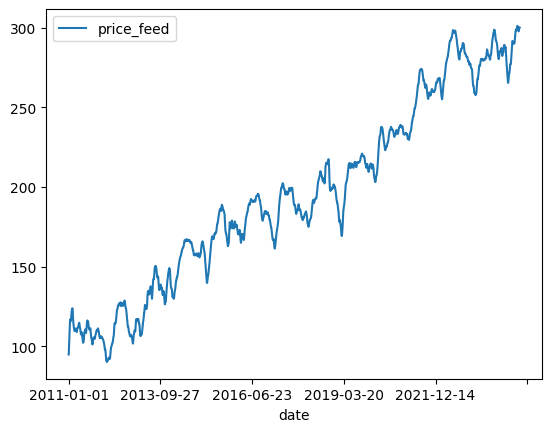

In [15]:
# 5384169 corresponds to Atlanta city
ATL = 5384169
sales_price_feeds.loc[sales_price_feeds['parcl_id'] == ATL].sort_values('date').plot(x='date', y='price_feed')

### 4. Create a Spreadsheet for Backtesting

In [19]:
# lets pull in name, location_type, total_population, and median_income
df = sales_price_feeds.merge(sales_pricefeed_markets[['parcl_id', 'name', 'location_type', 'total_population', 'median_income']], on='parcl_id', how='inner')
df.head()

,date,price_feed,parcl_id,name,location_type,total_population,median_income
0,2024-06-17,415.29,5306725,Denver City,CITY,710800,85853
1,2024-06-16,415.16,5306725,Denver City,CITY,710800,85853
2,2024-06-15,414.92,5306725,Denver City,CITY,710800,85853
3,2024-06-14,414.58,5306725,Denver City,CITY,710800,85853
4,2024-06-13,414.61,5306725,Denver City,CITY,710800,85853


In [ ]:
# save to csv
df.to_csv('parcl_data.csv', index=False)